In [11]:
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import shapiro

In [30]:
# Load the dataset
file_path = 'C:/Users/sudet/Downloads/210/final_dataset.xlsx'
df = pd.read_excel(file_path)

# Encode moods if not already encoded
mood_mapping = {
    "strong negative": -3,
    "negative": -2,
    "mildly negative": -1,
    "neutral": 0,
    "mildly positive": 1,
    "positive": 2,
    "strong positive": 3
}
df['Encoded Emotional State'] = df['Emotional State'].map(mood_mapping)

# Create a category mapping if not already created
category_mapping = {
    'thrifting': 0, 'clothing': 1, 'food': 2, 'market': 3, 'other': 4, 
    'education': 5, 'credit card payment': 6, 'skincare': 7, 'transportation': 8, 
    'make-up': 9, 'investment': 10, 'subscription': 11, 'social': 12, 'travel cost': 13
}

# Encode categories
df['Encoded Category'] = df['Category'].map(category_mapping)

In [10]:
# Classify as positive or non-positive
df['Mood Category'] = df['Encoded Emotional State'].apply(lambda x: 'Positive' if x > 0 else 'Non-Positive')

# Split spending data by mood category
positive_spending = df[df['Mood Category'] == 'Positive']['Amount']
non_positive_spending = df[df['Mood Category'] == 'Non-Positive']['Amount']

# Perform statistical test
# Use t-test (assuming normality)
t_stat, p_value_t = ttest_ind(positive_spending, non_positive_spending, equal_var=False)

# Use Mann-Whitney U test (if normality assumption is not met)
u_stat, p_value_u = mannwhitneyu(positive_spending, non_positive_spending)

# Print results
print("T-Test Results: t-statistic =", t_stat, ", p-value =", p_value_t)
print("Mann-Whitney U Test Results: U-statistic =", u_stat, ", p-value =", p_value_u)


T-Test Results: t-statistic = 0.5321050650376227 , p-value = 0.5948253327857993
Mann-Whitney U Test Results: U-statistic = 70471.0 , p-value = 0.6414083554358415


In [13]:
# Define thrifting data and other data
thrifting_data = df[df['Category'] == 'thrifting']['Encoded Emotional State'].dropna()
other_data = df[df['Category'] != 'thrifting']['Encoded Emotional State'].dropna()

# Shapiro-Wilk test for "thrifting"
shapiro_stat_thrifting, shapiro_p_thrifting = shapiro(thrifting_data)
print("Shapiro-Wilk Test (Thrifting):", shapiro_stat_thrifting, ", p-value =", shapiro_p_thrifting)

# Shapiro-Wilk test for "other categories"
shapiro_stat_other, shapiro_p_other = shapiro(other_data)
print("Shapiro-Wilk Test (Other Categories):", shapiro_stat_other, ", p-value =", shapiro_p_other)

Shapiro-Wilk Test (Thrifting): 0.8435120582580566 , p-value = 0.0235062837600708
Shapiro-Wilk Test (Other Categories): 0.9334938526153564 , p-value = 1.2362808501157057e-16


In [15]:
# Filter data for thrifting and non-thrifting and drop NaN values
thrifting_data = df[df['Category'] == 'thrifting']['Encoded Emotional State'].dropna()
other_data = df[df['Category'] != 'thrifting']['Encoded Emotional State'].dropna()

# Perform a t-test
t_stat, p_value_t = ttest_ind(thrifting_data, other_data, equal_var=False)

# Perform a Mann-Whitney U test
u_stat, p_value_u = mannwhitneyu(thrifting_data, other_data)

# Results
print("T-Test Results: t-statistic =", t_stat, ", p-value =", p_value_t)
print("Mann-Whitney U Test Results: U-statistic =", u_stat, ", p-value =", p_value_u)

# Compare mean emotional states
mean_thrifting = thrifting_data.mean()
mean_other = other_data.mean()

print("Mean Emotional State (Thrifting):", mean_thrifting)
print("Mean Emotional State (Other Categories):", mean_other)


T-Test Results: t-statistic = 7.211315102185643 , p-value = 4.941820852500346e-06
Mann-Whitney U Test Results: U-statistic = 7003.5 , p-value = 0.00010886764942767127
Mean Emotional State (Thrifting): 2.076923076923077
Mean Emotional State (Other Categories): 0.1021021021021021


In [16]:
df['Positive Mood'] = df['Encoded Emotional State'] > 0


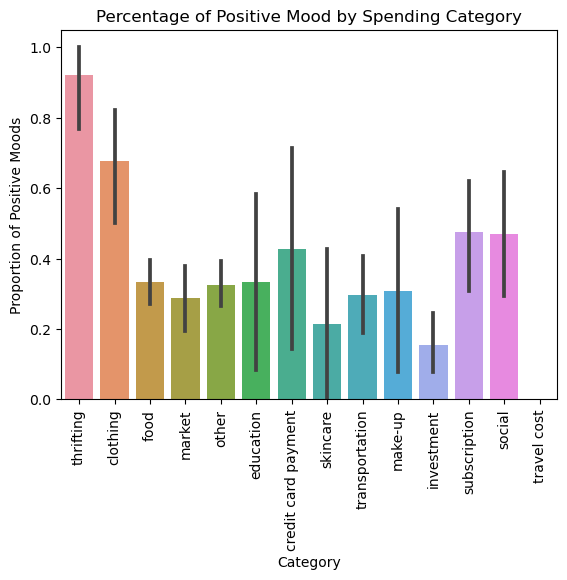

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Category', y='Positive Mood', data=df, estimator=lambda x: x.mean())
plt.title('Percentage of Positive Mood by Spending Category')
plt.ylabel('Proportion of Positive Moods')
plt.xticks(rotation=90)
plt.show()


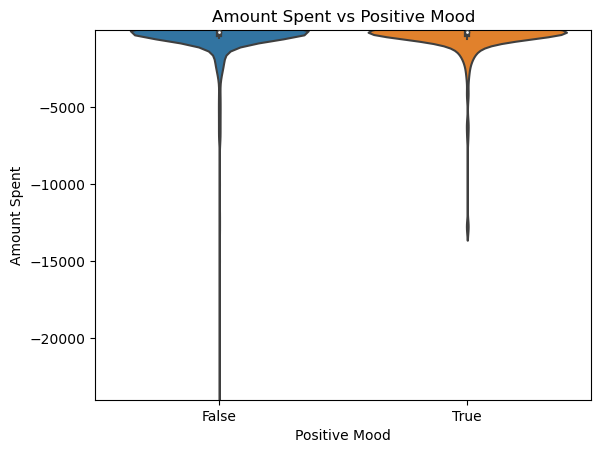

In [24]:
sns.violinplot(x='Positive Mood', y='Amount', data=df)
plt.title('Amount Spent vs Positive Mood')
plt.xlabel('Positive Mood')
plt.ylabel('Amount Spent')
plt.ylim(df['Amount'].min(), df['Amount'].max())  # Adjust y-axis to show the full range of amounts
plt.show()


In [32]:
# Create a separate column for each category
for category in category_mapping.keys():
    df[f'Category_{category}'] = df['Category'].apply(lambda x: 1 if x == category else 0)

# Display the updated dataframe
print(df.head())

         Date   Time   Amount   Balance  \
0  25.10.2024  23:42  -257.99  17224.27   
1  25.10.2024  19:47 -1939.95  17482.26   
2  25.10.2024  15:29   -70.00  19422.21   
3  25.10.2024  12:34   -32.00  19492.21   
4  25.10.2024  12:28   -20.00  19524.21   

                                   Description   Category  Emotional State  \
0           046 DOLAP.COM            XXXX 6703  thrifting  strong positive   
1        046 IYZICO /ZARA.COM     XXXX 6703 3D   clothing  strong positive   
2           062 PIZZA RESTAURANTLARI XXXX 6703       food  strong positive   
3  046 7036 İSTANBUL SABANC TEMASSIZ XXXX 6703     market  strong positive   
4              7777/MBL-HAV.ALİ OSMAN TERLEMEZ      other  strong positive   

   Encoded Emotional State  Encoded Category  Category_thrifting  ...  \
0                      3.0                 0                   1  ...   
1                      3.0                 1                   0  ...   
2                      3.0                 2         

In [35]:
# Create a separate column for each emotional state
for mood in mood_mapping.keys():
    df[f'EmotionalState_{mood}'] = df['Emotional State'].apply(lambda x: 1 if x == mood else 0)

# Display the updated dataframe
print(df.head())

         Date   Time   Amount   Balance  \
0  25.10.2024  23:42  -257.99  17224.27   
1  25.10.2024  19:47 -1939.95  17482.26   
2  25.10.2024  15:29   -70.00  19422.21   
3  25.10.2024  12:34   -32.00  19492.21   
4  25.10.2024  12:28   -20.00  19524.21   

                                   Description   Category  Emotional State  \
0           046 DOLAP.COM            XXXX 6703  thrifting  strong positive   
1        046 IYZICO /ZARA.COM     XXXX 6703 3D   clothing  strong positive   
2           062 PIZZA RESTAURANTLARI XXXX 6703       food  strong positive   
3  046 7036 İSTANBUL SABANC TEMASSIZ XXXX 6703     market  strong positive   
4              7777/MBL-HAV.ALİ OSMAN TERLEMEZ      other  strong positive   

   Encoded Emotional State  Encoded Category  Category_thrifting  ...  \
0                      3.0                 0                   1  ...   
1                      3.0                 1                   0  ...   
2                      3.0                 2         

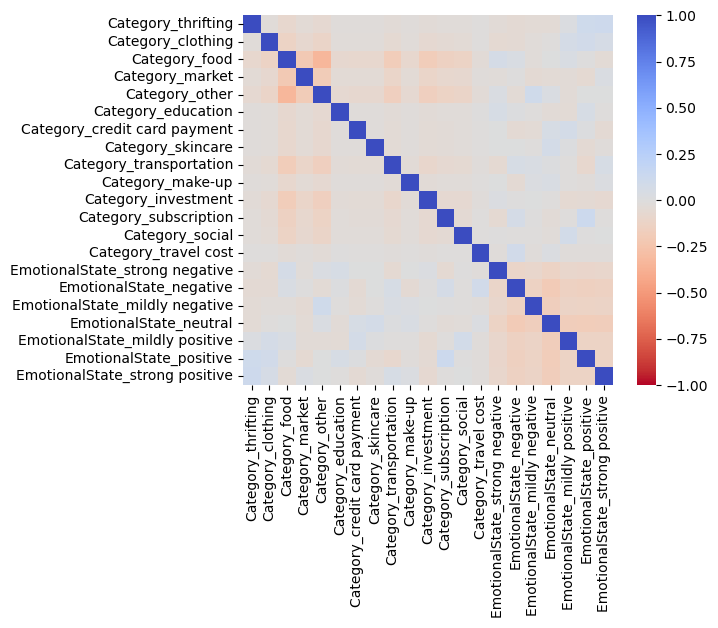

In [39]:
colormaps = [
    'viridis', 'plasma', 'inferno', 'magma', # perceptually uniform
    'Greys', 'Purples', 'Blues', 'BuPu', 'GnBu', # sequential
    'spring', 'hot', 'bone', 'winter', # sequential 2
    'PiYG', 'PRGn', 'coolwarm', 'bwr', 'seismic', # diverging
    'twilight', 'twilight_shifted', 'hsv' # cyclic
]

# Dropping the categorical columns
# Dataframe.corr() gives us the correlation matrix
sns.heatmap( data=df.drop(labels=['Date', 'Time', 'Description', 'Category', 'Emotional State', 'Amount', 'Balance', 'Encoded Emotional State', ], axis=1).corr(),
            annot=False, cmap='coolwarm_r', square=True, vmin=-1, vmax=1)

plt.show()